<a href="https://colab.research.google.com/github/vamsikartik01/Deep-Learning/blob/main/neural_net_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Net with one hidden layer - 4 input logic.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
X = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[0,1,1,0],[1,1,1,0],[1,1,0,1],[1,0,1,1],[0,1,1,1],[1,1,1,1],[0,0,1,1],[1,1,0,0]])
X

array([[0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [1, 1, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 1, 1],
       [1, 1, 0, 0]])

In [59]:
X = X.T
X

array([[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]])

In [60]:
X.shape

(4, 12)

In [61]:
Y = np.array([[0],[0],[0],[0],[1],[1],[1],[1],[1],[1],[0],[0]])
Y

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]])

In [62]:
Y = Y.T
Y

array([[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0]])

In [63]:
Y.shape

(1, 12)

In [64]:
n_i = X.shape[0]
n_h = 3
n_o = Y.shape[0]

In [65]:
w1 = np.random.uniform(size=(n_i,n_h))
b1 = np.random.uniform(size=(n_h,1))
w2 = np.random.uniform(size=(n_h,n_o))
b2 = np.random.uniform(size=(n_o,1))

In [66]:
print(w1.shape)
print(b1.shape)
print(w2.shape)
print(b2.shape)

(4, 3)
(3, 1)
(3, 1)
(1, 1)


In [67]:
def sigmoid(z):
  return (1/(1+np.exp(-z)))

In [68]:
epochs = 5000
lr =0.1

In [69]:
costs = []
for epoch in range(epochs):
  m = X.shape[1]
  Yh = np.tanh(np.dot(w1.T,X)+b1)
  A = sigmoid(np.dot(w2.T,Yh)+b2)

  cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
  costs.append(cost)

  dw2 = (1/m)*np.dot(Yh,(A-Y).T)
  db2 = (1/m)*np.sum(A-Y)
  dh = np.dot(w2.T,(A-Y)*(1-Yh**2))
  dw1 = (1/m)*np.dot(X,dh.T)
  db1 = (1/m)*np.sum(dh)

  w1 = w1 - lr*dw1
  b1 = b1 - lr*db1
  w2 = w2 - lr*dw2
  b2 = b2 - lr*db2

In [70]:
w1,w2,b1,b2

(array([[1.17335063, 0.82592163, 1.60774617],
        [2.43354554, 2.38670435, 2.57593174],
        [2.48568905, 2.537209  , 2.16522968],
        [1.40099885, 0.9190949 , 1.61707785]]), array([[3.58153932],
        [3.37623257],
        [3.84686125]]), array([[-4.12372118],
        [-4.20458085],
        [-4.36329408]]), array([[-0.2361304]]))

In [71]:
def predict(X):
  Yh = np.tanh(np.dot(w1.T,X)+b1)
  A = sigmoid(np.dot(w2.T,Yh)+b2)
  A = (A > 0.5) * 1
  return A

In [72]:
predict(X)

array([[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0]])

In [74]:
Y

array([[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0]])

In [73]:
arr = np.array([[1,1,0,0]])
arr = arr.T
predict(arr)

array([[0]])

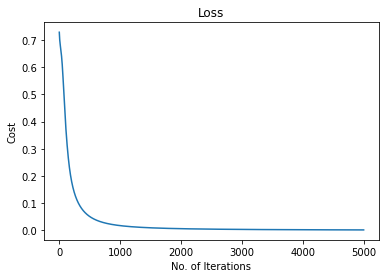

In [77]:
plt.plot(costs)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.title('Loss')
plt.show()